In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_path = '../../kge/data/biokg'

In [3]:
# Read edge data
edges = [
    pd.read_csv(f'{data_path}/{split}.txt', header=None, sep='\t')
    for split in ['train', 'test', 'valid']
]
edges = pd.concat(edges)
edges

,0,1,2
0,A0A075B6P5,MEMBER_OF_COMPLEX,R-HSA-1479277
1,A0A075B6P5,PROTEIN_PATHWAY_ASSOCIATION,R-HSA-166663
2,A0A075B6S6,MEMBER_OF_COMPLEX,R-HSA-1479277
3,A0A078BQP2,PROTEIN_PATHWAY_ASSOCIATION,R-CEL-2514859
4,A0A087WPF7,PROTEIN_PATHWAY_ASSOCIATION,R-MMU-8939243
...,...,...,...
206795,DB09217,DDI,DB09394
206796,DB00361,DDI,DB13287
206797,Q04725,PPI,Q13547
206798,R-HSA-9684119,COMPLEX_TOP_LEVEL_PATHWAY,R-HSA-73894


Text(0.5, 1.0, 'BioKG edge type counts')

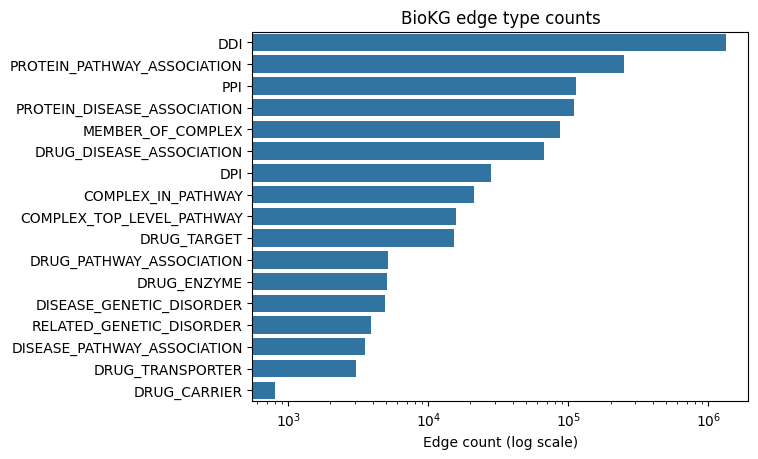

In [61]:
rel_counts = pd.DataFrame(edges[1].value_counts())
rel_counts['rel'] = rel_counts.index  # Store as column so can do horizontal bar plot

sns.barplot(data=rel_counts, x='count', y='rel')
plt.xscale('log', base=10)
plt.ylabel('')
plt.xlabel('Edge count (log scale)')
plt.title('BioKG edge type counts')

Text(0.5, 1.0, 'BioKG node type counts')

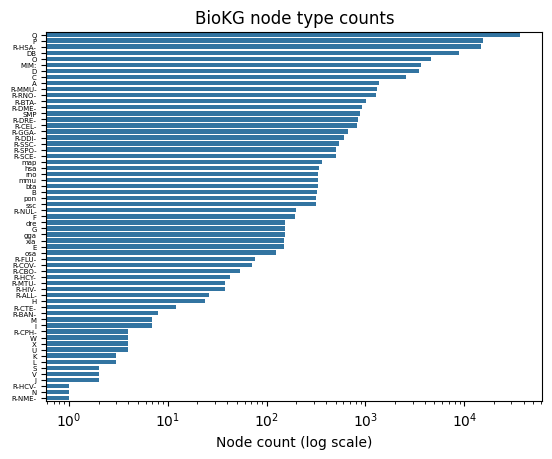

In [91]:
def split_node_id_prefix(s):
    """
    Naive method for getting prefixes of node IDs.
    Iterates through string, finds first int, returns slice up to that character.
    """
    for i, char in enumerate(s):
        try:
            int(char)
            break
        except:
            continue
    return s[:i]

all_nodes = set(edges[0].unique()).union(set(edges[2].unique()))
prefixes = [split_node_id_prefix(node) for node in all_nodes]
meta_nodes = pd.DataFrame(pd.Series(prefixes).value_counts())
meta_nodes['node_type'] = meta_nodes.index


sns.barplot(data=meta_nodes, x='count', y='node_type', dodge=False, gap=0.1)
plt.xscale('log', base=10)
plt.ylabel('')
plt.yticks(size=5)
plt.xlabel('Node count (log scale)')
plt.title('BioKG node type counts')

# TODO:

- Improve readability of y-axis on node count plot
    - Also check data sources to see which 'meta nodes' can be grouped

- Schema - which node types are connected by which edge types?
    - edges.groupby(1) then see what node prefixes in each subdf
    - Then can calculate per-relation graph statistics e.g. density, clustering coef, etc.
